In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\erick\Python\cr_loan2.csv', sep=',')

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
#Entendendo as variáveis deste dataset

#person_age - É a idade do tomador de crédito
#person_income - É a renda do tomador de crédito
#person_home_ownership - Se o tomador de crédito é dono da sua residência, paga aluguel, esta hipotecada ou outra coisa
#person_emp_length - Representa o tempo de emprego do tomador de crédito
#loan_intent - Descreve a finalidade/objetivo do tomador de crédito
#loan_grade - Descreve o rating do tomador de crédito
#loan_amnt - Descreve o valor do empréstimo
#loan_int_rate - Descreve a taxa de juros do contrato de crédito
#loan_status - Descreve o status do empréstimo, representado em um binário (0 está em dia, 1 está inadimplente)
#loan_percent_income - Descreve a proporção entre o valor tomado e a renda do tomador de crédito
#cb_person_default_on_file - Indica se o tomador de crédito tem histórico de inadimplência
#cb_person_cred_hist_length - Representa o cumprimento do histórico de crédito

In [5]:
#Como boas praticas, vamos rodar as estatisticas basicas

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
#Vamos guardar o dataset cru
df_new = df.copy()

In [8]:
#Algumas variaveis que nao deveriam ter valores nulos, possuem, vamos dar uma olhada nelas
df_filtrado = df[df['loan_int_rate'].isnull()]
print(df_filtrado)

       person_age  person_income person_home_ownership  person_emp_length  \
39             23          71500                  RENT                3.0   
50             24          78000                  RENT                4.0   
57             23         277000                   OWN                3.0   
59             24          12000                   OWN                2.0   
62             26         263000              MORTGAGE                0.0   
...           ...            ...                   ...                ...   
32547          53           4888                   OWN                0.0   
32552          65          45900                  RENT                2.0   
32553          54          20000                  RENT                2.0   
32569          51          60000              MORTGAGE                1.0   
32570          58          72000                  RENT                5.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status 

In [9]:
#Vamos fazer um tratamento para esses valores e melhorar os nossos dados
#Puxando as medias
df_sumarizado = df.groupby('loan_grade')['loan_int_rate'].mean().reset_index()
print(df_sumarizado)

  loan_grade  loan_int_rate
0          A       7.327651
1          B      10.995555
2          C      13.463542
3          D      15.361448
4          E      17.009455
5          F      18.609159
6          G      20.251525


In [10]:
media_por_rating = df.groupby('loan_grade')['loan_int_rate'].mean()

# Preenche os valores nulos em loan_int_rate com a media correspondente
df['loan_int_rate'] = df.apply(lambda row: media_por_rating[row['loan_grade']] if pd.isnull(row['loan_int_rate']) else row['loan_int_rate'], axis=1)
print(df)

       person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
1              21           9600                   OWN                5.0   
2              25           9600              MORTGAGE                1.0   
3              23          65500                  RENT                4.0   
4              24          54400                  RENT                8.0   
...           ...            ...                   ...                ...   
32576          57          53000              MORTGAGE                1.0   
32577          54         120000              MORTGAGE                4.0   
32578          65          76000                  RENT                3.0   
32579          56         150000              MORTGAGE                5.0   
32580          66          42000                  RENT                2.0   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \

In [11]:
df['person_emp_length'].fillna((df['person_emp_length'].median()), inplace = True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [13]:
#Que legal, resolvemos a questao de nulos em uma variavel importante com um bom valor de proxy

In [14]:
df['loan_status'].value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [15]:
pd.crosstab(df["person_home_ownership"], df["loan_status"], values = df["loan_int_rate"], aggfunc= "mean").round(3)

loan_status,0,1
person_home_ownership,,
MORTGAGE,10.070,13.423
OTHER,11.356,13.881
OWN,10.762,12.105
RENT,10.757,12.950


In [16]:
#Acima, vemos informacoes cruciais, a distribuicao de contratos em default e as taxa de juros media, vamos continuar com essa analise
pd.crosstab(df["cb_person_default_on_file"], df["loan_status"], values = df["loan_int_rate"], aggfunc= "mean").round(3)

loan_status,0,1
cb_person_default_on_file,,
N,9.846,12.094
Y,14.096,15.200


In [17]:
pd.crosstab(df["loan_intent"], df["loan_status"], values = df["loan_int_rate"], aggfunc= "mean").round(3)

loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,10.033,13.439
EDUCATION,10.644,12.487
HOMEIMPROVEMENT,10.615,12.899
MEDICAL,10.191,13.364
PERSONAL,10.593,12.540
VENTURE,10.533,13.277


In [18]:
pd.crosstab(df['loan_intent'], df['loan_status'], margins = True)

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


In [19]:
pd.crosstab(df['person_home_ownership'], df['loan_status'], values=df['loan_percent_income'], aggfunc="mean")

loan_status,0,1
person_home_ownership,,
MORTGAGE,0.146504,0.184882
OTHER,0.143784,0.300000
OWN,0.180013,0.297358
RENT,0.144611,0.264859


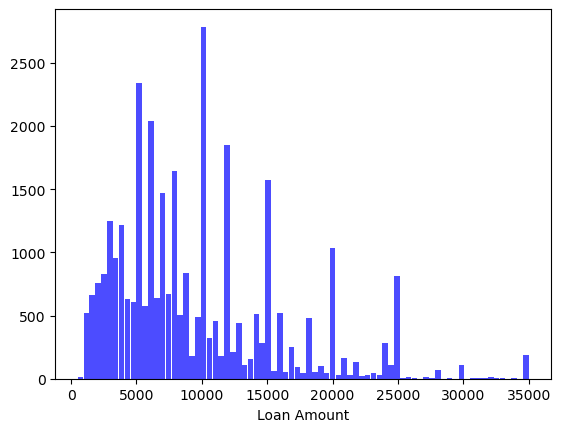

In [20]:
#Aqui vemos como valor dos emprestimos estao distribuidos 
n, bins, patches = plt.hist(x = df["loan_amnt"], bins = "auto", color = "blue", alpha = 0.7, rwidth = 0.95)
plt.xlabel("Loan Amount")
plt.show()

In [21]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observacoes: {dataframe.shape[0]}")
    print(f"Variaveis: {dataframe.shape[1]}")
    print(f'Colunas categoricas: {len(cat_cols)}')
    print(f'Colunas numericas: {len(num_cols)}')
    print(f'Colunas categóricas com alta cardinalidade: {len(cat_but_car)}')
    print(f'Colunas categóricas com baixa cardinalidade: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car,num_but_cat

cat_cols, num_cols, cat_but_car,num_but_cat =grab_col_names(df)

Observacoes: 32581
Variaveis: 12
Colunas categoricas: 5
Colunas numericas: 7
Colunas categóricas com alta cardinalidade: 0
Colunas categóricas com baixa cardinalidade: 1


In [22]:
print('Nossa variavel dependente sera')
print(num_but_cat)
print('As 5 variaveis categoricas')
print(cat_cols)
print('As 7 variaveis numericas')
print(num_cols)


Nossa variavel dependente sera
['loan_status']
As 5 variaveis categoricas
['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'loan_status']
As 7 variaveis numericas
['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']


In [23]:
#Vamos pegar a media das colunas de valor de acordo com as colunas de inadimplencia
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")
for col in num_cols:
    target_summary_with_num(df, "loan_status",col)

             person_age
loan_status            
0             27.807129
1             27.474676


             person_income
loan_status               
0             70804.361559
1             49125.652223


             person_emp_length
loan_status                   
0                     4.945432
1                     4.132105


                loan_amnt
loan_status              
0             9237.464178
1            10850.502954


             loan_int_rate
loan_status               
0                10.442364
1                13.043400


             loan_percent_income
loan_status                     
0                       0.148805
1                       0.246889


             cb_person_cred_hist_length
loan_status                            
0                              5.837475
1                              5.685003




In [24]:
#Vamos agora verificar os outliers
def outlier_limite(dataframe, col_name, q1=0.01, q3=0.99):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_limite(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

for col in num_cols:
    print(col, check_outlier(df, col))
#person_age, person_income and person_emp_lenght possuem outliers.

person_age True
person_income True
person_emp_length True
loan_amnt False
loan_int_rate False
loan_percent_income False
cb_person_cred_hist_length False


In [25]:
outlier_limite(df, num_cols)

(person_age                       -22.500000
 person_income                -301800.000000
 person_emp_length                -25.500000
 loan_amnt                     -42200.000000
 loan_int_rate                    -14.363738
 loan_percent_income               -0.700000
 cb_person_cred_hist_length       -20.500000
 dtype: float64,
 person_age                        93.500000
 person_income                 541400.000000
 person_emp_length                 42.500000
 loan_amnt                      73000.000000
 loan_int_rate                     38.392897
 loan_percent_income                1.220000
 cb_person_cred_hist_length        39.500000
 dtype: float64)

In [26]:
df[df["person_age"] > 93].index

Index([81, 183, 575, 747, 32297, 32416], dtype='int64')

In [27]:
#Tem algo errado com a coluna de idade, vamos arrumar isso repondo estes outliers
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_limite(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    replace_with_thresholds(df, col)

#Checando
for col in num_cols:
    print(col, check_outlier(df, col))

#Agora resolvemos os outliers

person_age False
person_income False
person_emp_length False
loan_amnt False
loan_int_rate False
loan_percent_income False
cb_person_cred_hist_length False


In [28]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")
rare_analyser(df, "loan_status", cat_cols)

#One Hot Encoding - Por que fazemos ---> https://arthurlambletvaz.medium.com/one-hot-encoding-o-que-é-cd2e8d302ae0
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() >= 2 and col not in "loan_status"]
df2 = one_hot_encoder(df, ohe_cols,drop_first=True)

df2.columns

person_home_ownership : 4
                       COUNT     RATIO  TARGET_MEAN
person_home_ownership                              
MORTGAGE               13444  0.412633     0.125707
OTHER                    107  0.003284     0.308411
OWN                     2584  0.079310     0.074690
RENT                   16446  0.504773     0.315700


loan_intent : 6
                   COUNT     RATIO  TARGET_MEAN
loan_intent                                    
DEBTCONSOLIDATION   5212  0.159971     0.285879
EDUCATION           6453  0.198060     0.172168
HOMEIMPROVEMENT     3605  0.110647     0.261026
MEDICAL             6071  0.186336     0.267007
PERSONAL            5521  0.169455     0.198877
VENTURE             5719  0.175532     0.148103


loan_grade : 7
            COUNT     RATIO  TARGET_MEAN
loan_grade                              
A           10777  0.330776     0.099564
B           10451  0.320770     0.162760
C            6458  0.198214     0.207340
D            3626  0.111292     0.5904

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_Y'],
      dtype='object')

In [29]:
#Imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay, roc_curve
from sklearn.model_selection import train_test_split, cross_validate, KFold
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve, cross_val_score
from sklearn.calibration import calibration_curve
from sklearn.metrics import roc_auc_score
import warnings
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler


#Pandas Ajustes
pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=Warning)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [30]:
#Agora vamos criar o modelo
#Regressão Logística Multivariada
y = df2['loan_status']
X = df2.drop(['loan_status'], axis=1)
#Modelo
logit = LogisticRegression().fit(X,y)

In [31]:
logit.coef_

array([[-5.28866712e-08, -4.08285179e-05, -2.45274131e-08,
         1.07307177e-04,  9.47312442e-08,  2.61050333e-09,
        -9.09233200e-09,  8.06423100e-11, -4.02344685e-09,
         8.32960422e-09, -3.03334766e-09,  1.79936268e-09,
         1.37383464e-09, -1.18190707e-09, -3.70756849e-09,
        -5.60392872e-09, -1.39442869e-09,  1.08367409e-08,
         3.45020492e-09,  1.00623515e-09,  4.22009596e-10,
         7.13916771e-09]])

In [32]:
#Previsoes
y_pred = logit.predict(X)
y_pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

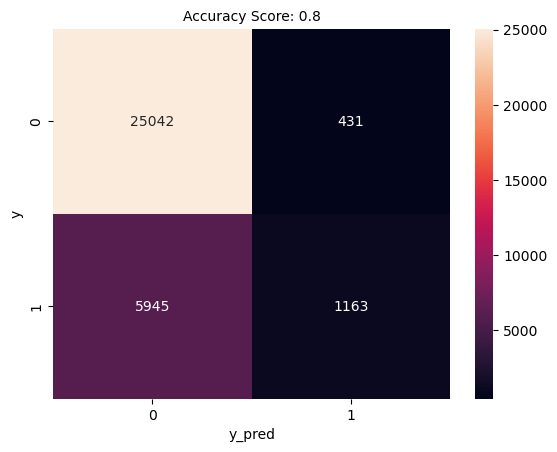

In [33]:
#Matriz de Confusao
def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(y, y_pred)

In [34]:
#Verdadeiros Positivos (True Positives - TP): - São os casos em que o modelo previu corretamente que um empréstimo resultaria em default (classe positiva). - há 1163 verdadeiros positivos
#Falsos Positivos (False Positives - FP): Representam os casos em que o modelo previu incorretamente que um empréstimo resultaria em default, mas na verdade não resultou. - existem 431 falsos positivos
#Verdadeiros Negativos (True Negatives - TN): - São os casos em que o modelo previu corretamente que um empréstimo não resultaria em default (classe negativa). - tem 25042 verdadeiros negativos
#Falsos Negativos (False Negatives - FN): Indicam os casos em que o modelo previu incorretamente que um empréstimo não resultaria em default, mas na verdade resultou. - há 5945 falsos negativos

In [35]:
#Validacao de modelo: Holdout
#Dividindo a base
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 112224)

In [36]:

#Construindo modelo com set de treino
logit_model = LogisticRegression().fit(X_train, y_train)

#Prevendo o set de testes
y_pred = logit_model.predict(X_test)

#Para o AUC Score(Prob de ser Default)
y_prob = logit_model.predict_proba(X_test)[:, 1]



#Classification Report
print(classification_report(y_test, y_pred))


#F-1 score e muito baixo.

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      5130
           1       0.74      0.16      0.27      1387

    accuracy                           0.81      6517
   macro avg       0.78      0.57      0.58      6517
weighted avg       0.80      0.81      0.76      6517



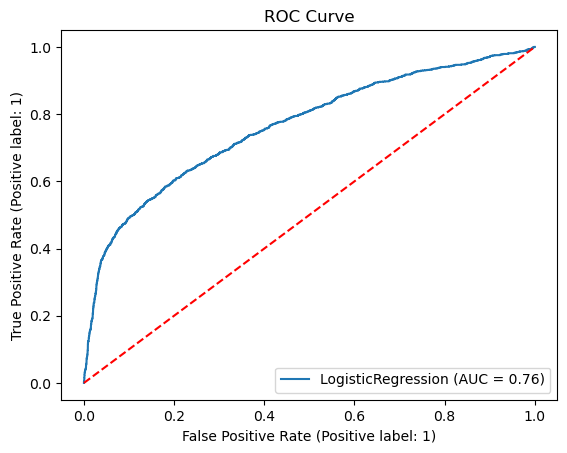

0.7633643509558965

In [37]:
#Curva ROC e ROC AUC Score

# Curva ROC
RocCurveDisplay.from_estimator(logit_model, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

roc_auc_score(y_test, y_prob)

In [38]:
#Validacao de modelo: "5-Fold Cross Validation"

y = df2["loan_status"]
X = df2.drop(["loan_status"], axis=1)

#Modelo
logit = LogisticRegression().fit(X,y)

In [39]:
cv_logit_acc = cross_val_score(logit, X,y,cv = 10, scoring = "accuracy")
cv_logit_f1 = cross_val_score(logit, X,y,cv = 10, scoring = "f1")
cv_logit_roc = cross_val_score(logit, X,y,cv = 10, scoring = "roc_auc")

In [40]:
cv_logit_acc.mean()

0.8025226171619755

In [41]:
#Acuracia

In [42]:
cv_logit_f1.mean()

0.249315735453883

In [43]:
#Valor de F1-SCORE

In [44]:
cv_logit_roc.mean()

0.7690072543640826

In [45]:
#Valor da ROC

In [46]:
#Em resumo, aqui construimos um modelo mas ele nao foi muito eficiente em prever os contratos que se tornaram inadimplentes, vamos tentar mudar isso com uma outra abordagem
#XGBOOST

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 112224)

In [48]:

#Otimização de hiperparâmetros (ajuste de modelo)

#função
def objective(trial):

    data = df2


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=112224)



    params = {

        'objective': 'binary:logistic',

        'max_depth': trial.suggest_int('max_depth', 1, 9),

        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),

        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-8, 1.0)

    }



    clf_gbt = xgb.XGBClassifier(**params)

    clf_gbt.fit(X_train, y_train, eval_metric = 'error')



    gbt_preds = clf_gbt.predict(X_test)



    accuracy = accuracy_score(y_test, gbt_preds)

    return (1-accuracy)



if __name__ == '__main__':



    study = optuna.create_study()

    study.optimize(objective, n_trials=50)



    print(study.best_params)
   
    

[I 2024-02-17 08:01:46,784] A new study created in memory with name: no-name-357df23e-3fbb-4b68-89a0-6d3b45f01713
[I 2024-02-17 08:01:47,465] Trial 0 finished with value: 0.09452201933404936 and parameters: {'max_depth': 4, 'n_estimators': 252, 'learning_rate': 2.4681599626120523e-07}. Best is trial 0 with value: 0.09452201933404936.
[I 2024-02-17 08:01:49,857] Trial 1 finished with value: 0.0718121835200245 and parameters: {'max_depth': 9, 'n_estimators': 285, 'learning_rate': 6.621692993913824e-05}. Best is trial 1 with value: 0.0718121835200245.
[I 2024-02-17 08:01:50,135] Trial 2 finished with value: 0.1155439619456805 and parameters: {'max_depth': 3, 'n_estimators': 68, 'learning_rate': 0.001039042448533147}. Best is trial 1 with value: 0.0718121835200245.
[I 2024-02-17 08:01:52,719] Trial 3 finished with value: 0.06183826914224333 and parameters: {'max_depth': 4, 'n_estimators': 700, 'learning_rate': 0.031287289658078615}. Best is trial 3 with value: 0.06183826914224333.
[I 2024-

[I 2024-02-17 08:03:02,500] Trial 37 finished with value: 0.06521405554703086 and parameters: {'max_depth': 5, 'n_estimators': 298, 'learning_rate': 0.01772593605565278}. Best is trial 24 with value: 0.05938315175694342.
[I 2024-02-17 08:03:05,146] Trial 38 finished with value: 0.06015037593984962 and parameters: {'max_depth': 9, 'n_estimators': 463, 'learning_rate': 0.3205932744992564}. Best is trial 24 with value: 0.05938315175694342.
[I 2024-02-17 08:03:06,549] Trial 39 finished with value: 0.07733619763694954 and parameters: {'max_depth': 8, 'n_estimators': 238, 'learning_rate': 1.4911411023539107e-08}. Best is trial 24 with value: 0.05938315175694342.
[I 2024-02-17 08:03:09,179] Trial 40 finished with value: 0.07794997698327455 and parameters: {'max_depth': 7, 'n_estimators': 546, 'learning_rate': 0.0019042858554078907}. Best is trial 24 with value: 0.05938315175694342.
[I 2024-02-17 08:03:10,444] Trial 41 finished with value: 0.06153137946908083 and parameters: {'max_depth': 9, '

{'max_depth': 8, 'n_estimators': 118, 'learning_rate': 0.15824980680046732}


In [49]:
#Treinando o modelo
clf_gbt = xgb.XGBClassifier(**study.best_params).fit(X_train, np.ravel(y_train), eval_metric = "error")
#Probabilidade de previsões
gbt_preds = clf_gbt.predict_proba(X_test)

#Comparacao de valores verdadeiros e previstos
preds_df = pd.DataFrame(gbt_preds[:,1], columns = ['gbt_prob_default'])
true_df = y_test

print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1).head(50))

    loan_status  gbt_prob_default
0             1           0.94732
1             0           0.01307
2             0           0.03431
3             1           0.14380
4             0           0.05331
5             0           0.03445
6             0           0.11362
7             1           0.99607
8             0           0.08449
9             0           0.01924
10            0           0.03918
11            0           0.02285
12            0           0.00080
13            1           0.53051
14            0           0.02668
15            0           0.01765
16            0           0.00919
17            0           0.09041
18            0           0.16840
19            0           0.23683
20            0           0.04901
21            0           0.00029
22            0           0.12704
23            0           0.00052
24            0           0.02545
25            0           0.02972
26            0           0.18913
27            0           0.04051
28            

In [50]:
#Portfolio de Performance
y_prob_df = pd.DataFrame(y_prob, columns = ["lr_prob_default"])
portfolio = pd.concat([preds_df.reset_index(drop=True), y_prob_df], axis = 1)

loans = X_test["loan_amnt"]
loans.reset_index(drop=True, inplace=True)
portfolio["loan_amount"] = loans
portfolio.head()

,gbt_prob_default,lr_prob_default,loan_amount
0,0.94732,0.00906,7775
1,0.01307,0.23622,8000
2,0.03431,0.07268,24250
3,0.14380,0.36945,6000
4,0.05331,0.12820,6000


In [51]:
#Assumimos uma LGD de 0,2 e que e constante
#Criando uma coluna de Perdas Esperadas
lgd = 0.2
portfolio["gbt_expected_loss"] = portfolio["gbt_prob_default"] * lgd * portfolio["loan_amount"]
portfolio["lr_expected_loss"] = portfolio["lr_prob_default"] * lgd * portfolio["loan_amount"]

portfolio.head()

,gbt_prob_default,lr_prob_default,loan_amount,gbt_expected_loss,lr_expected_loss
0,0.94732,0.00906,7775,1473.08401,14.09491
1,0.01307,0.23622,8000,20.91700,377.94584
2,0.03431,0.07268,24250,166.39567,352.49005
3,0.14380,0.36945,6000,172.56111,443.34516
4,0.05331,0.12820,6000,63.97593,153.84417


In [52]:
#Aqui entao temos, uma comparacao da PE do modelo LOGIT (LR) e do modelo XGB (gbt) 

In [53]:
#Soma da PE para o modelo LOGIT
print('LR expected loss: ', np.sum(portfolio['lr_expected_loss']))

LR expected loss:  3108546.8657476073


In [54]:
#Soma da PE para o modelo XGBOOST
print('XGB expected loss: ', np.sum(portfolio['gbt_expected_loss']))

XGB expected loss:  2992417.7953674365


In [55]:
LR_expected_loss =  3108547.5195690366
GBT_expected_loss = 3044509.2289176947
print(LR_expected_loss - GBT_expected_loss)

64038.2906513419


In [56]:
#Diferenca de 64 mil dolares, o modelo XBG esta prevendo melhor e economizando mais em provisionamento.

In [57]:
# Previsao para o 'loan_status'
gbt_preds = clf_gbt.predict(X_test)

# Classification report do modelo
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))

#O modelo XGBoost e superior ao modelo LOGIT

              precision    recall  f1-score   support

 Non-Default       0.94      0.99      0.96      5130
     Default       0.97      0.75      0.85      1387

    accuracy                           0.94      6517
   macro avg       0.95      0.87      0.90      6517
weighted avg       0.94      0.94      0.94      6517



In [58]:
#Importancia de variaveis

print(clf_gbt.get_booster().get_score(importance_type = 'weight'))

{'person_age': 735.0, 'person_income': 1880.0, 'person_emp_length': 766.0, 'loan_amnt': 879.0, 'loan_int_rate': 1184.0, 'loan_percent_income': 712.0, 'cb_person_cred_hist_length': 447.0, 'person_home_ownership_OTHER': 19.0, 'person_home_ownership_OWN': 109.0, 'person_home_ownership_RENT': 241.0, 'loan_intent_EDUCATION': 132.0, 'loan_intent_HOMEIMPROVEMENT': 141.0, 'loan_intent_MEDICAL': 141.0, 'loan_intent_PERSONAL': 124.0, 'loan_intent_VENTURE': 127.0, 'loan_grade_B': 66.0, 'loan_grade_C': 98.0, 'loan_grade_D': 105.0, 'loan_grade_E': 53.0, 'loan_grade_F': 24.0, 'loan_grade_G': 35.0, 'cb_person_default_on_file_Y': 87.0}


In [59]:
#Cross Validation

cv_results_accuracy= cross_val_score(clf_gbt, X,y,cv = 10, scoring = "accuracy")

In [60]:
cv_results_accuracy.mean()
#Acuracia

0.9113289618153326

In [61]:
cv_results_f1= cross_val_score(clf_gbt, X,y,cv = 10, scoring = "f1")

In [62]:
cv_results_f1.mean()
#Media

0.77948733262652

In [63]:
cv_results_roc= cross_val_score(clf_gbt, X,y,cv = 10, scoring = "roc_auc")

In [64]:
cv_results_roc.mean()
#ROC

0.9129933054048168

In [65]:
#Comparacao das ROC AUC Score dos modelos

clf_logistic_preds = logit_model.predict(X_test)
clf_gbt_preds = clf_gbt.predict(X_test)

print("Logistic Regression AUC Score: %0.2f" % roc_auc_score(y_test, clf_logistic_preds))

Logistic Regression AUC Score: 0.57


In [66]:
print("Gradient Boosted Tree AUC Score: %0.2f" % roc_auc_score(y_test, clf_gbt_preds))

Gradient Boosted Tree AUC Score: 0.87


In [67]:
#Dado os resultados, vamos partir agora para a elaboracao de uma tabela de analise

In [68]:
gbt_preds = clf_gbt.predict_proba(X_test)

preds_df = pd.DataFrame(gbt_preds[:,1], columns = ['gbt_prob_default'])
true_df = y_test

test_pred_df = pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1)

#Estatisticas basicas
print(test_pred_df["gbt_prob_default"].describe())

count   6517.00000
mean       0.21216
std        0.33953
min        0.00002
25%        0.01253
50%        0.05022
75%        0.17638
max        0.99990
Name: gbt_prob_default, dtype: float64


In [69]:
#Suponha que queremos aceitar empréstimos apenas com probabilidade inferior a 85% de default
#Limite
threshold_85 = np.quantile(test_pred_df['gbt_prob_default'], 0.85)
threshold_85
#Portanto rejeitaremos os empréstimos acima da nossa taxa limite.

0.8140013575553855

In [70]:
#Aplicando taxa de aceitação
test_pred_df['pred_loan_status'] = test_pred_df['gbt_prob_default'].apply(lambda x: 1 if x > threshold_85 else 0)

print(test_pred_df['pred_loan_status'].value_counts())

pred_loan_status
0    5539
1     978
Name: count, dtype: int64


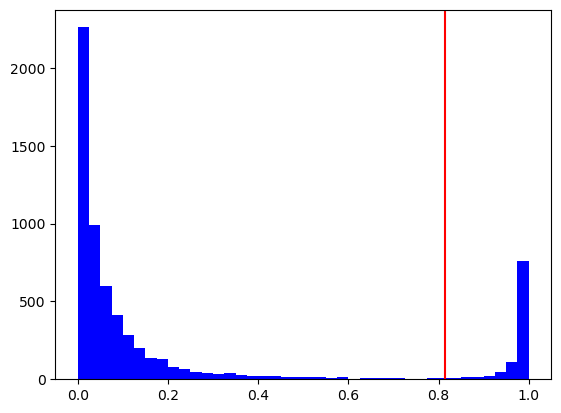

In [71]:
#Visualizando os quantis de aceitação

plt.hist(preds_df, color = 'blue', bins = 40)
plt.axvline(x = threshold_85, color = 'red')
plt.show()

In [72]:
# Conjunto apenas dos empréstimos aceitos
accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]

# Calculo de bad rate
np.sum(accepted_loans['loan_status']) / accepted_loans['loan_status'].count()



0.07438165733886984

In [ ]:
#Isso significa que de todos os empréstimos que decidimos aceitar do conjunto de testes, apenas 7,5% eram default reais

In [88]:
#Criando uma tabela de estrategia
accept_rates = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
thresholds = []
bad_rates = []
for rate in accept_rates:
    #Cálculo do limite para a taxa de aceitação
    thresh = np.quantile(preds_df['gbt_prob_default'], rate).round(3)
    # Adicionando o valor limite à lista de limites
    thresholds.append(np.quantile(preds_df['gbt_prob_default'], rate).round(3))
    # Reatribuindo o loan_status usando o limite
    test_pred_df['pred_loan_status'] = test_pred_df['gbt_prob_default'].apply(lambda x: 1 if x > thresh else 0)
    # Conjunto de empréstimos aceitos usando esta taxa de aceitação
    accepted_loans = test_pred_df[test_pred_df["pred_loan_status"] == 0]
    # Calculo e appendacao da "bad rate" usando a taxa de aceitação
    bad_rates.append(np.sum((accepted_loans["loan_status"]) / len(accepted_loans["loan_status"])).round(3))

# Tabela Estrategia
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates),
                        columns = ['Acceptance Rate','Threshold','Bad Rate'])
print(strat_df)

    Acceptance Rate  Threshold  Bad Rate
0           1.00000    1.00000   0.21300
1           0.95000    0.99500   0.17500
2           0.90000    0.98500   0.12600
3           0.85000    0.81400   0.07400
4           0.80000    0.28200   0.05100
5           0.75000    0.17600   0.04000
6           0.70000    0.12700   0.03200
7           0.65000    0.09800   0.02600
8           0.60000    0.07800   0.02100
9           0.55000    0.06300   0.01800
10          0.50000    0.05000   0.01500
11          0.45000    0.04100   0.01300
12          0.40000    0.03200   0.00900
13          0.35000    0.02500   0.00500
14          0.30000    0.01900   0.00400
15          0.25000    0.01300   0.00400
16          0.20000    0.00700   0.00200
17          0.15000    0.00200   0.00000
18          0.10000    0.00100   0.00000
19          0.05000    0.00000   0.00000


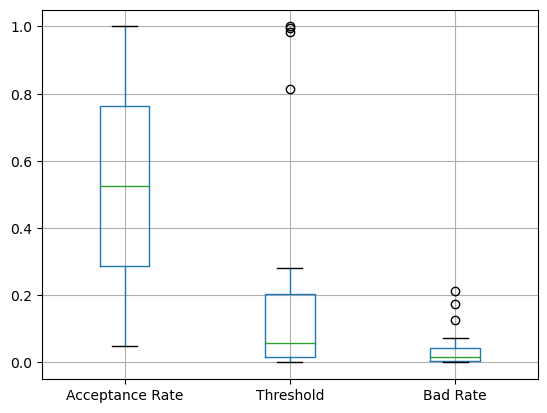

In [89]:
#Vendo a Tabela Estrategia

strat_df.boxplot()
plt.show()

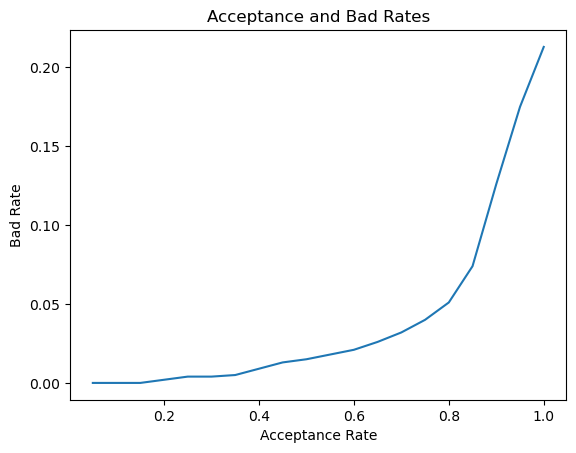

In [90]:
#Olhando a Curva de Estrategia
plt.plot(strat_df["Acceptance Rate"], strat_df["Bad Rate"])
plt.xlabel('Acceptance Rate')
plt.ylabel('Bad Rate')
plt.title('Acceptance and Bad Rates')

plt.show()

In [91]:
#Calculando a perda esperada
strat_df["Num Accepted Loans"] = len(y_test) * strat_df["Acceptance Rate"]
strat_df["Avg Loan Amnt"] = X_test["loan_amnt"].mean()
strat_df["Estimated Value"] = ((strat_df["Num Accepted Loans"] - strat_df["Num Accepted Loans"] * strat_df["Bad Rate"]) * strat_df["Avg Loan Amnt"]) - \
                              (strat_df["Num Accepted Loans"] * strat_df["Bad Rate"] * strat_df["Avg Loan Amnt"])
strat_df.head()

,Acceptance Rate,Threshold,Bad Rate,Num Accepted Loans,Avg Loan Amnt,Estimated Value
0,1.00000,1.00000,0.21300,6517.00000,9596.20224,35897070.30000
1,0.95000,0.99500,0.17500,6191.15000,9596.20224,38617492.87500
2,0.90000,0.98500,0.12600,5865.30000,9596.20224,42100884.54000
3,0.85000,0.81400,0.07400,5539.45000,9596.20224,45290345.49000
4,0.80000,0.28200,0.05100,5213.60000,9596.20224,44927622.48000


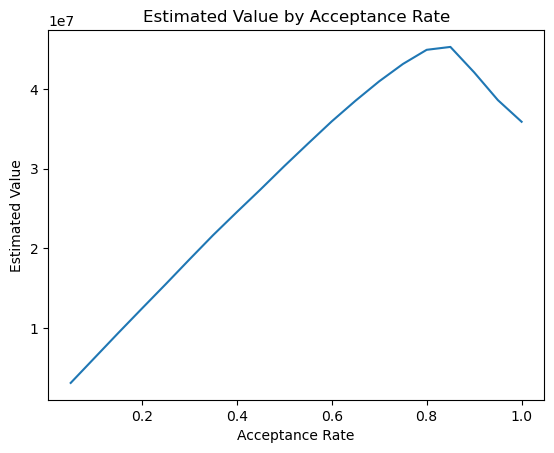

In [77]:
#Gráfico de linha do valor estimado
plt.plot(strat_df["Acceptance Rate"],strat_df["Estimated Value"])
plt.title('Estimated Value by Acceptance Rate')
plt.xlabel('Acceptance Rate')
plt.ylabel('Estimated Value')
plt.show()

In [92]:
test_pred_df["loan_amnt"] = X_test["loan_amnt"]

#Assumindo que a LGD e 0,8
test_pred_df["loss_given_default"] = 0.8

#Calculo da PE
test_pred_df["expected_loss"] =  test_pred_df["gbt_prob_default"] * test_pred_df["loan_amnt"]\
                                * test_pred_df["loss_given_default"]
tot_exp_loss = round(np.sum(test_pred_df["expected_loss"]),2)

print('Total da PE: ', '${:,.2f}'.format(tot_exp_loss))

Total da PE:  $11,969,670.99


In [ ]:
#Com esse exercicio, conseguimos testar dois modelos de calculo para a PE e exemplificar algo que nao esta muita na academia e mais no aspecto de trabalho de grandes bancos, as medidas de PD, LGD, EAD e PE sao de grande importancia, pois controla o risco de credito bancario e garante a solidez e saude financeira da nacao.